In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load dataset
df=pd.read_csv("Advertising.csv")
#to show first 5 records
df.head()


Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True) #to delete permanently column 
#Unnamed: 0 from dataframe df
#to show first 5 records
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [4]:
#to check null values 
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#in ths dataset , we want to predict sales means this is contineous numeric value
#means solve by linear regression
#we have multiple input so we use multiple linear regression means many input
#and one output

In [6]:
#basic steps means visualise the scatterplot between input and output , to check
#relation between input and output

#select input and output from dataset df
X=df.drop("sales",axis=1) #to copy all columns from df to X apart from sales
#here X input variable
Y=df["sales"] #output variable


TV


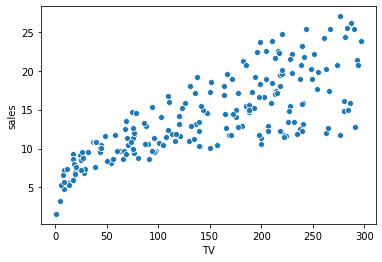

radio


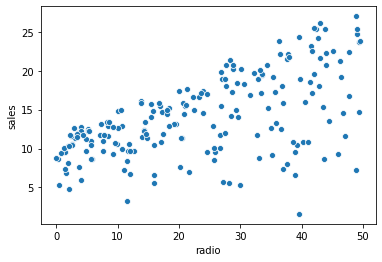

newspaper


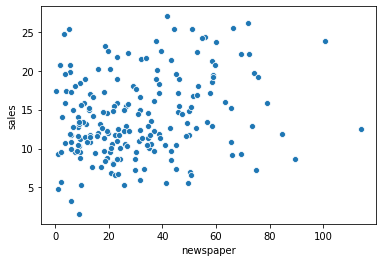

In [8]:
#we create a sctter plot
for col in X :
    print(col)
    sns.scatterplot(df[col],Y)   #scatterplot(X,Y)
    plt.show()



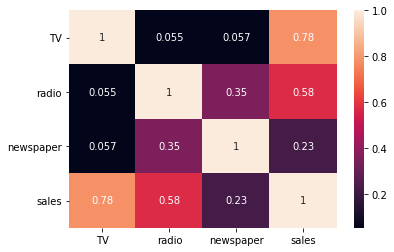

In [9]:
#check correlation value and visualize in heatmap()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
#select input and output from dataset df
X=df.drop("sales",axis=1) #to copy all columns from df to X apart from sales
#here X input variable
Y=df["sales"] #output variable


In [11]:
##Divide the dataset into 70% and 30% for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [12]:
X_train.shape


(140, 3)

In [13]:
X_train.head()


TV  radio  newspaper
116  139.2   14.3       25.6
67   139.3   14.5       10.2
78     5.4   29.9        9.4
42   293.6   27.7        1.8
17   281.4   39.6       55.8

In [ ]:
#we train the model with the help of multiple linear regression 
#equation of MLR :  Y_pred=m1*X1+m2*X2+m3*X3+b
#X1=TV X2=radio and X3=newspaper
#means Y_pred=m1*TV+m2*radio+m3*newspaper+b



In [14]:
#call class LinearRegression 
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()

In [16]:
#train the model use fit() with 70% training data 
#fit() is a inbuilt method of LinearRegression class
lr.fit(X_train,Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [18]:
lr.intercept_

2.9372157346906125

In [23]:
Y_pred=lr.predict(X_test)

In [24]:
Y_pred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

In [22]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(Y_test,Y_pred)

1.9289249074665737